[Home](../../README.md)

### Data Preprocessing

This Jupyter Notebook demonstrates different processes you can apply to your data to better understand it before data wrangling. For this demonstration we will use relatively a complex real dataset that compares health measures with the speed of progress of type 2 adult onset diabetes.

#### Load the required dependencies

Load the two required dependencies:

- [Pandas](https://pandas.pydata.org/) is library for data analysis and manipulation.
- [Matplotlib](https://matplotlib.org) a comprehensive library for creating static, animated, and interactive visualizations in Python. A customised stylesheet for the visualisations is also applied.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('../../style_Matplotlib_charts.mplstyle')

####  Store the data as a local variable

The data frame is a Pandas object that structures your tabular data into an appropriate format. It loads the complete data in memory so it is now ready for preprocessing.

In [3]:
data_frame = pd.read_csv("2.1.2.SeoulBikeData_Sample_Data.csv")

#### Data Snapshot

It is important to get a high-level look at your dataset to understand what you are working with. Printing the complete data might be impossible for large-scale datasets where the rows can be in thousands or even millions.

You can use the `head()` and `tail()` method call to inspect the first and last 5 rows of your dataset.

In [4]:
# Count = A measure of bikes used depending on conditions
data_frame.head()

,Date,Count,Hour,Temp,Humidity,WindSpeed,Visibility,DewPointTemp,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


####  Data Summary
 
The `info()` method call prints a summary of each column, giving you more information about the specific data types, total number of rows, null values and memory usage.

* We can already tell there are no null features, which will be addressed through data wrangling

In [5]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             8760 non-null   object 
 1   Count            8760 non-null   int64  
 2   Hour             8760 non-null   int64  
 3   Temp             8760 non-null   float64
 4   Humidity         8760 non-null   int64  
 5   WindSpeed        8760 non-null   float64
 6   Visibility       8760 non-null   int64  
 7   DewPointTemp     8760 non-null   float64
 8   Solar Radiation  8760 non-null   float64
 9   Rainfall         8760 non-null   float64
 10  Snowfall         8760 non-null   float64
 11  Seasons          8760 non-null   object 
 12  Holiday          8760 non-null   object 
 13  Functioning Day  8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 958.3+ KB


#### Statistics For Numerical Columns
 
The `describe()` method call provides basic statistical knowledge like the mean and spread of the data.

In [6]:
data_frame.describe()

,Count,Hour,Temp,Humidity,WindSpeed,Visibility,DewPointTemp,Solar Radiation,Rainfall,Snowfall
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


#### Graphically present the data

At this early stage you are just wanting to evaluate the data, the below simple plots lets you look the data in different ways to inform your model design and data wrangling approaches.

* We can see little correlation between features

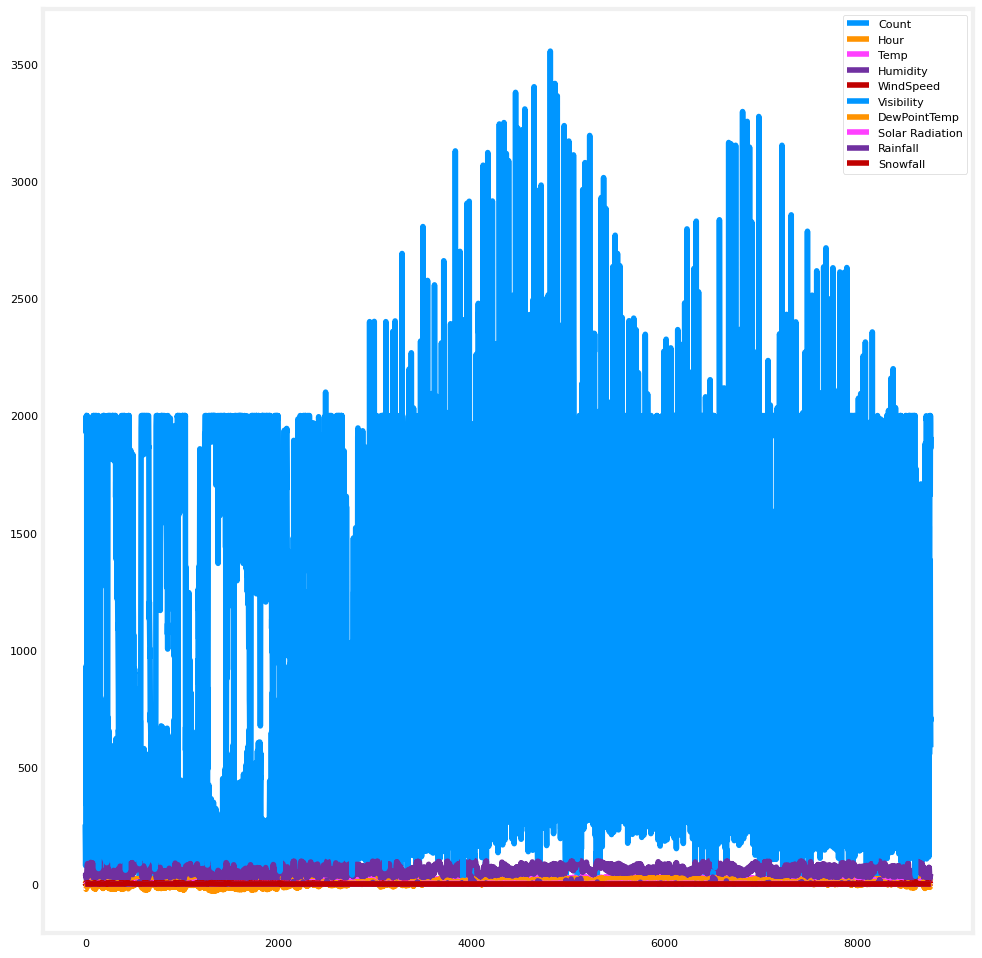

In [ ]:
data_frame.plot(figsize=(12, 6))  # Width = 12, Height = 6
plt.show()

* Since 'count' is vastly higher than other features, we will exclude it for better visibility

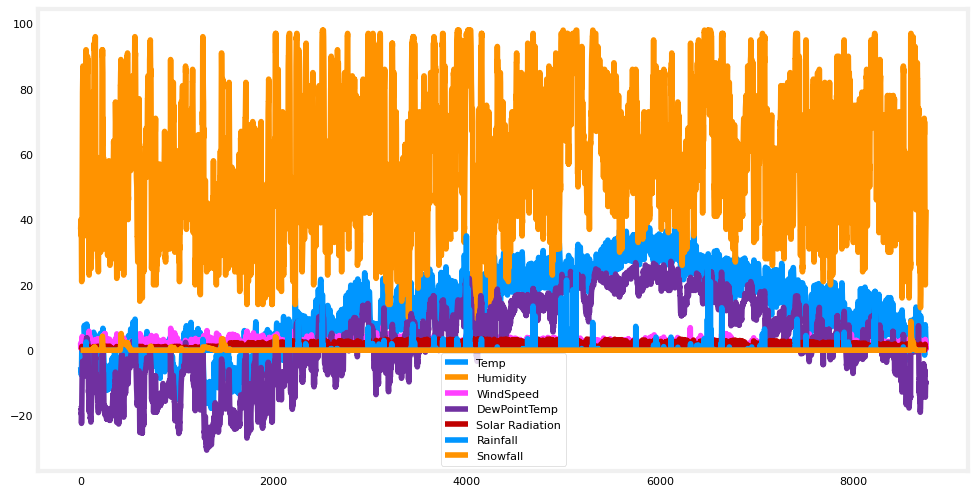

In [17]:
data_frame.drop(columns=['Count','Visibility','Hour']).plot(figsize=(12, 6))  # Width = 12, Height = 6
plt.show()

* We can see data is commonly skewed towards the center, likely due to daytime (rush hour)

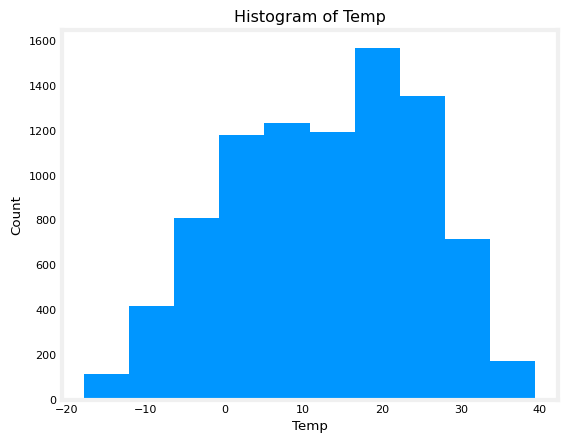

In [11]:
plt.hist(data_frame['Temp'])
plt.title(f"Histogram of {data_frame['Temp'].name}")
plt.ylabel('Count')
plt.xlabel(f'{data_frame["Temp"].name}')
plt.show()

* Since our dataset is comprised of +8000 rows, finding any correlation can be tricky due to outliers

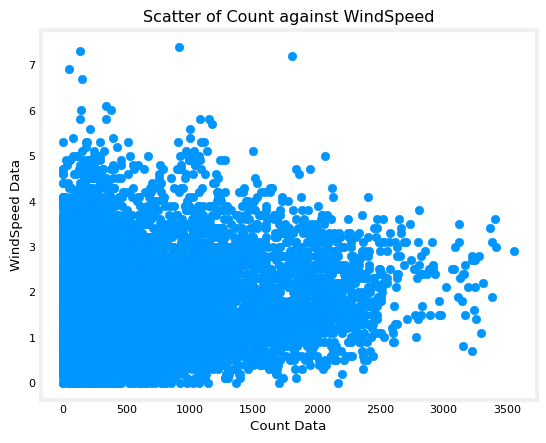

In [10]:
plt.scatter(data_frame['Count'], data_frame['WindSpeed'])
plt.title(f"Scatter of {data_frame['Count'].name} against {data_frame['WindSpeed'].name}")
plt.ylabel(f'{data_frame['WindSpeed'].name} Data')
plt.xlabel(f'{data_frame['Count'].name} Data')
plt.show()

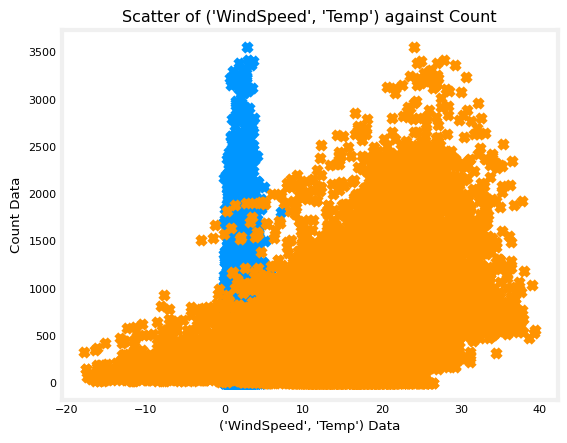

In [26]:
x_plot = ['WindSpeed', 'Temp']
for col in x_plot:
    plt.scatter(data_frame[col], data_frame['Count'], marker='x')
plt.title(f"Scatter of {*x_plot,} against {data_frame['Count'].name}")
plt.ylabel(f'{data_frame['Count'].name} Data')
plt.xlabel(f'{*x_plot,} Data')
plt.show()